### <center>Final Project Data Analysis</center>
---

### Import Library

In [20]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectPercentile, chi2, f_classif
from sklearn.feature_selection import RFE
from mlxtend.plotting import plot_confusion_matrix
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

### Read Data

In [2]:
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2021.csv", sep=",", encoding="utf-8")
data.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [3]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,...,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.142010,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,...,0.962573,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930,5.139099,6.927451
std,0.349061,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,...,0.189807,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997,0.946185,2.375450
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


### Data Preprocessing

In [4]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

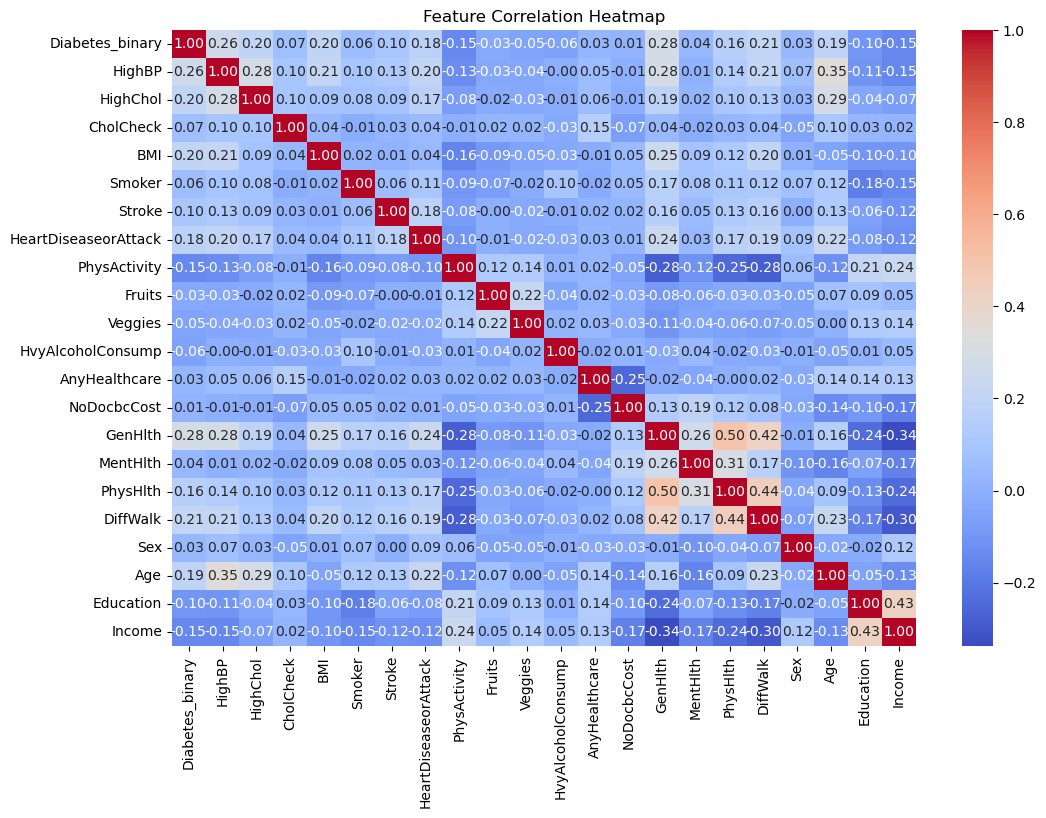

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
convert_column = data.columns[data.dtypes == "float64"]
data[convert_column] = data[convert_column].astype(int)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       236378 non-null  int32
 1   HighBP                236378 non-null  int64
 2   HighChol              236378 non-null  int32
 3   CholCheck             236378 non-null  int64
 4   BMI                   236378 non-null  int32
 5   Smoker                236378 non-null  int32
 6   Stroke                236378 non-null  int32
 7   HeartDiseaseorAttack  236378 non-null  int32
 8   PhysActivity          236378 non-null  int64
 9   Fruits                236378 non-null  int64
 10  Veggies               236378 non-null  int64
 11  HvyAlcoholConsump     236378 non-null  int64
 12  AnyHealthcare         236378 non-null  int64
 13  NoDocbcCost           236378 non-null  int32
 14  GenHlth               236378 non-null  int32
 15  MentHlth              236378 non-n

In [8]:
data.drop_duplicates(inplace=True)
print(f"Number of duplicated rows: {data.duplicated().sum()}")

Number of duplicated rows: 0


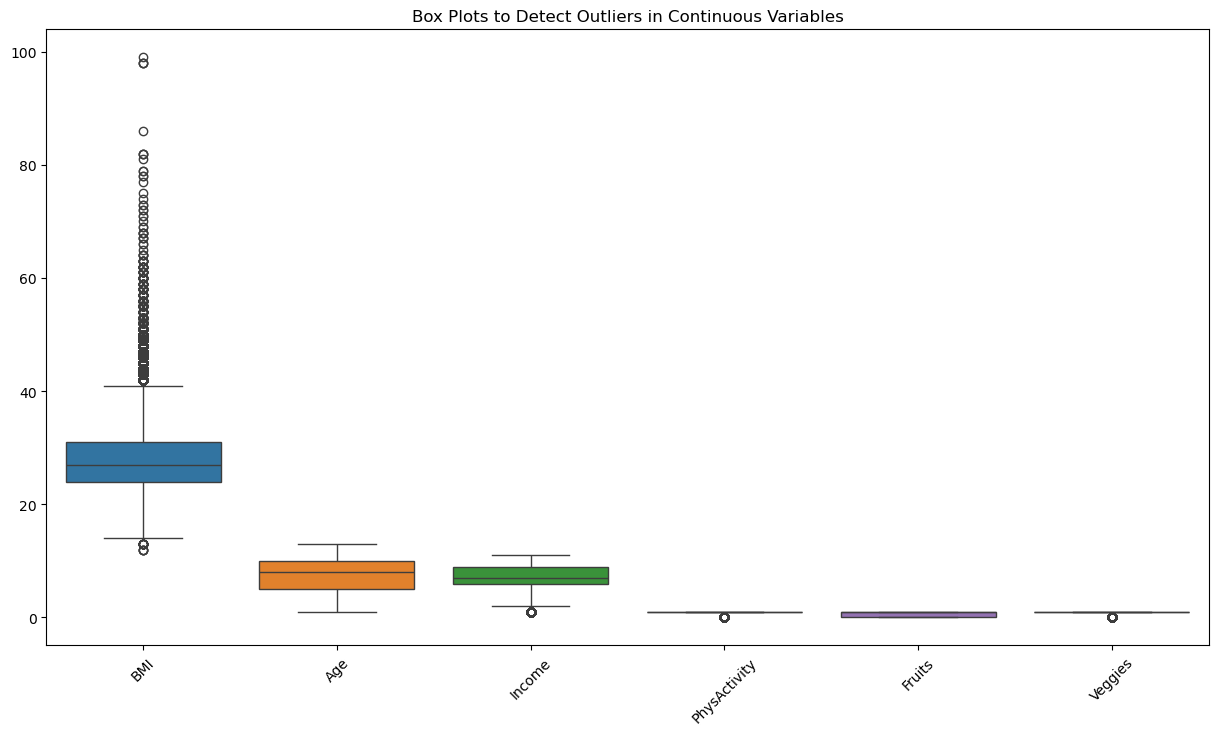

In [25]:
continuous_vars = ['BMI', 'Age', 'Income', 'PhysActivity', 'Fruits', 'Veggies']
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[continuous_vars])
plt.xticks(rotation=45)
plt.title('Box Plots to Detect Outliers in Continuous Variables')
plt.show()

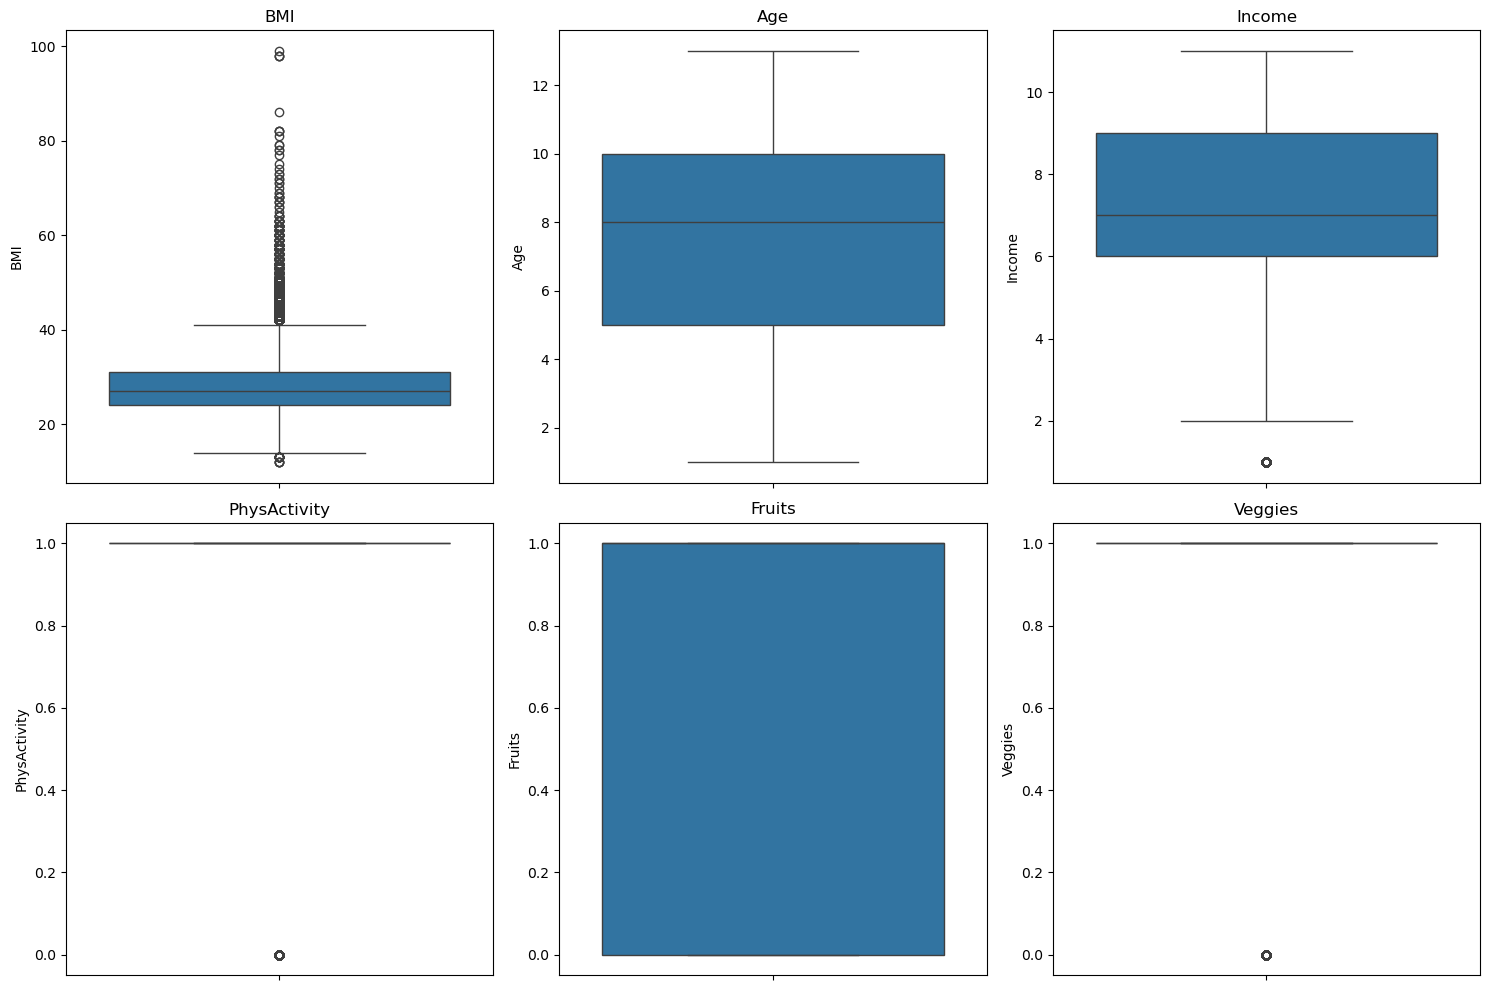

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    sns.boxplot(y=data[var], ax=axes[i//3][i%3])
    axes[i//3][i%3].set_title(var)
plt.tight_layout()
plt.show()

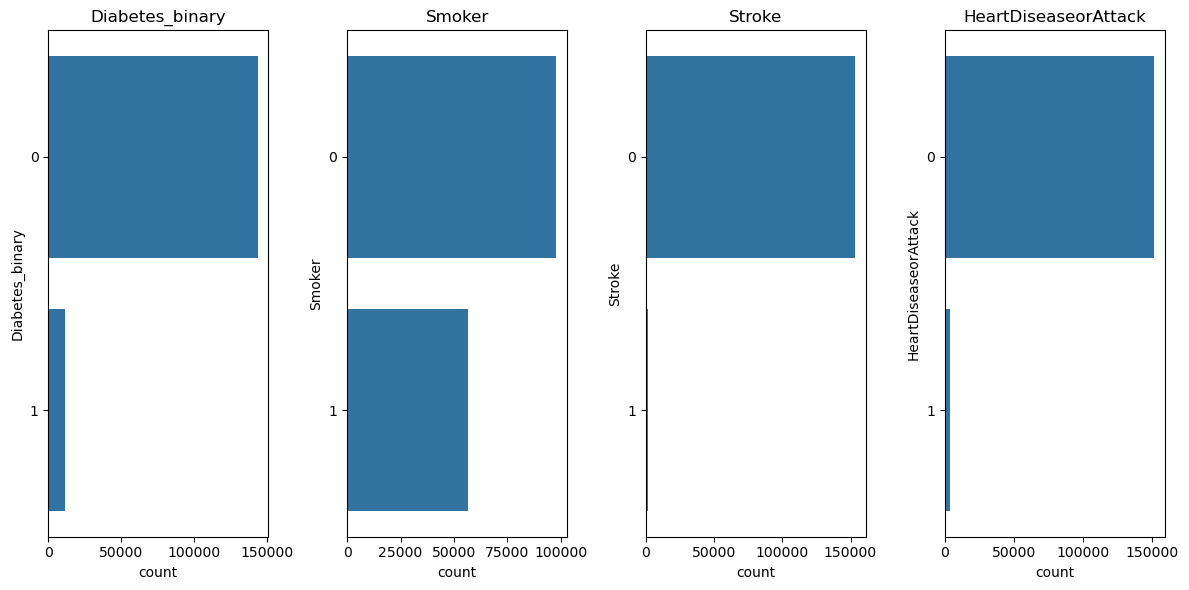

In [28]:
categorical_vars = ['Diabetes_binary', 'Smoker', 'Stroke', 'HeartDiseaseorAttack']
plt.figure(figsize=(12, 6))
for i, var in enumerate(categorical_vars):
    plt.subplot(1, 4, i+1)
    sns.countplot(data=data, y=var)
    plt.title(var)
plt.tight_layout()
plt.show()

In [ ]:
print(f"Number of duplicated rows: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)

isolation_model = IsolationForest()
data["anomaly"] = isolation_model.fit_predict(data)

print(f"Number of outliers detected: {data[data['anomaly'] == -1].shape[0]}")
data = data[data["anomaly"] != -1]
data.drop(columns=["anomaly"], inplace=True)
data.shape


Number of duplicated rows: 0
Number of outliers detected: 68473


(154770, 22)

### Modelling

In [10]:
x = data.drop(["Diabetes_binary"], axis=1)
y = data["Diabetes_binary"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns)
x.head(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.329774,1.328230,0.154143,0.804912,-0.760865,-0.092001,-0.152665,0.381048,0.736318,0.364725,...,0.112549,-0.145486,-0.266817,1.304585,-0.347724,-0.203732,-0.955861,0.445345,-1.525263,-0.189294
1,1.329774,1.328230,0.154143,0.283971,-0.760865,-0.092001,-0.152665,-2.624342,0.736318,0.364725,...,0.112549,-0.145486,-0.266817,-0.453437,-0.347724,-0.203732,-0.955861,-0.175012,-1.525263,-0.664533
2,-0.752008,-0.752882,0.154143,0.804912,1.314294,-0.092001,-0.152665,0.381048,-1.358110,0.364725,...,0.112549,-0.145486,2.156327,-0.453437,-0.347724,-0.203732,1.046177,-0.485191,-0.331376,-2.565488
3,1.329774,1.328230,0.154143,0.283971,-0.760865,-0.092001,-0.152665,-2.624342,0.736318,0.364725,...,0.112549,-0.145486,0.944755,-0.101833,0.637990,-0.203732,-0.955861,1.065702,-0.331376,-1.615010
4,1.329774,1.328230,0.154143,1.152206,1.314294,-0.092001,-0.152665,0.381048,0.736318,-2.741791,...,0.112549,-0.145486,0.944755,0.425574,0.391561,-0.203732,-0.955861,1.065702,-1.525263,-1.139772


### Smoteen

In [11]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)

### Splitting - Training 70 | Testing 30

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

### Model Evaluation

In [13]:
model_accuracies = {}

In [14]:
rf = RandomForestClassifier(n_estimators=100, max_features=16, max_depth=16)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {acc_rf:.4f}")
model_accuracies["Random Forest"] = acc_rf


Random Forest Test Accuracy: 0.9408


In [15]:
svm = SVC(C=1.0, kernel="rbf", gamma="scale")
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine Test Accuracy: {acc_svm:.4f}")
model_accuracies["Support Vector Machine"] = acc_svm

Support Vector Machine Test Accuracy: 0.8825


In [21]:
xgb = XGBClassifier(max_depth=20)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {acc_xgb:.4f}")
model_accuracies["XGBoost"] = acc_xgb

XGBoost Test Accuracy: 0.9692


In [22]:
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

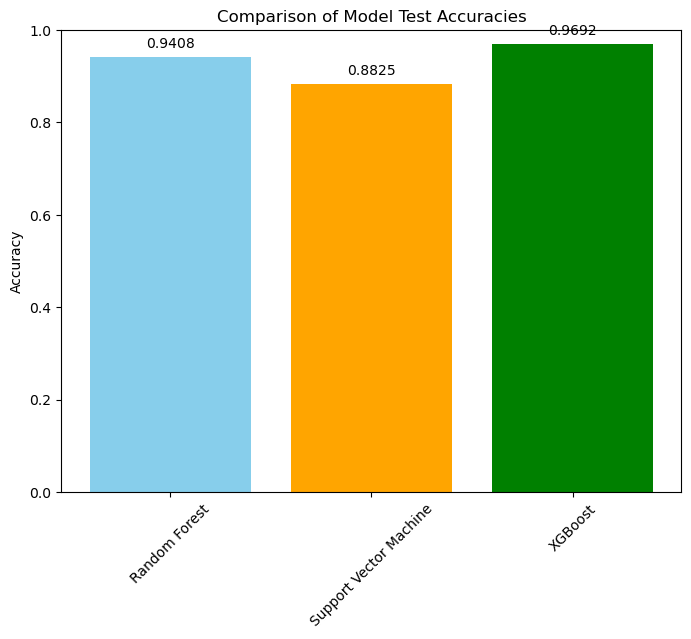

In [23]:
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'orange', 'green'])
plt.title("Comparison of Model Test Accuracies")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.4f}", ha='center', fontsize=10)
plt.show()

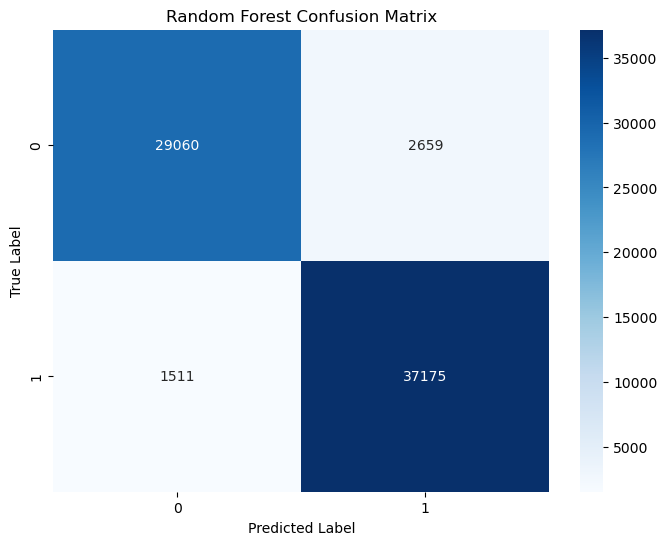

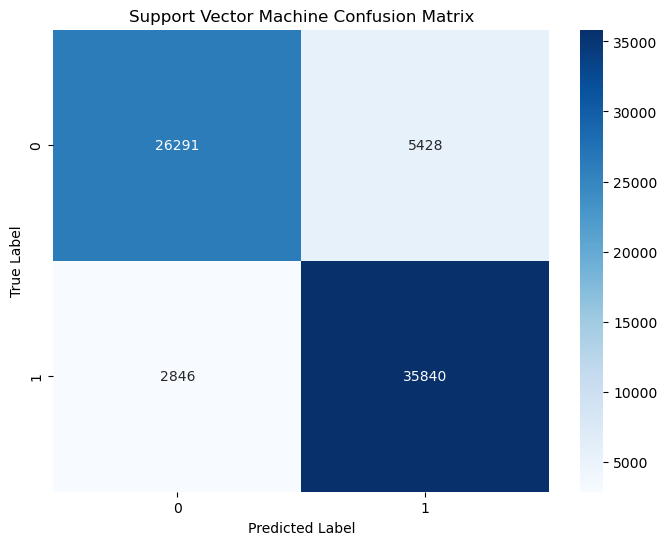

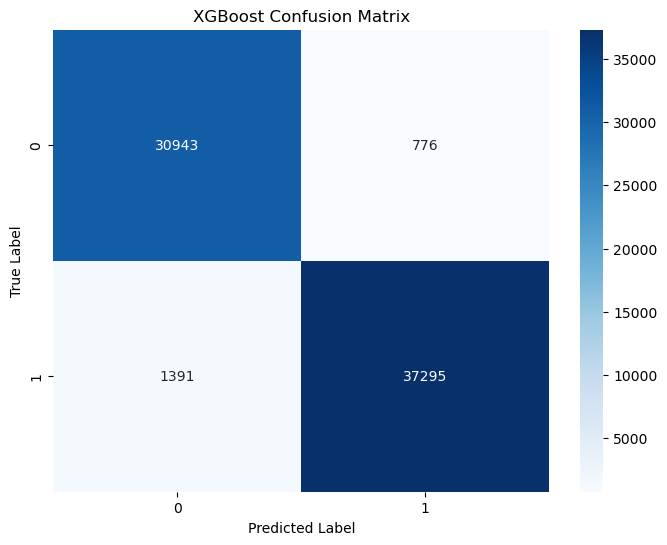

In [29]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

plot_confusion_matrix(y_test, y_pred_svm, 'Support Vector Machine')

plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')
